# 2.2 Working with Sets
## Representing Sets in Julia
- Create a set `Set()`
- Judge whether two sets are equal `isequal()`

In [1]:
A = Set([2,7,2,3])
B = Set(1:6)
omega = Set(1:10)

AunionB = union(A, B)
AintersectionB = intersect(A, B)
BdifferenceA = setdiff(B,A)
Bcomplement = setdiff(omega, B)
AsymDifferenceB = union(setdiff(A,B), setdiff(B,A))
println("A = $A, B = $B")
println("A union B = $AunionB")
println("A intersection B = $AintersectionB")
println("B diff A = $BdifferenceA")
println("B complement = $Bcomplement")
println("A symDifference B = $AsymDifferenceB")
println("The element '6' is an element of A: $(in(6,A))")
println("Symmetric difference and intersection are subsets of the union: ",
    issubset(AsymDifferenceB, AunionB),", ", issubset(AintersectionB, AunionB))

A = Set([7, 2, 3]), B = Set([5, 4, 6, 2, 3, 1])
A union B = Set([5, 4, 6, 7, 2, 3, 1])
A intersection B = Set([2, 3])
B diff A = Set([5, 4, 6, 1])
B complement = Set([7, 10, 9, 8])
A symDifference B = Set([5, 4, 6, 7, 1])
The element '6' is an element of A: false
Symmetric difference and intersection are subsets of the union: true, true


In [2]:
symdiff(A,B) == AsymDifferenceB

true

## Probability of a Union
$$
\mathbb{P}(A\cup B) = \mathbb{P}(A) + \mathbb{P}(B) - \mathbb{P}(A\cap B)
$$
- Consider all lowercase letter is sample space, Let $A$ be the event that letter is a vowel $A = \{"a", "e", "i", "o", "u"\}$; let $B$ be the event that the letter is one of the last three letters $B = \{"x", "y", "z"\}$, thus $\mathbb{P}(A\cup B) = \frac{5+3}{26} = \frac{8}{26}$
- In **mcEst1**, each of the $N$ random experiments involves two separate calls to `sample(omega)`. Hence the code in line 12 simulates a situation where the simple space $\Omega$ is composed of pairs of letters, not single letters! Thus the event $A\cup B$ is First element of the tuple is a vowel, the second element of tuple is one of the last three letters. $A$ and $B$ are not ***disjoint*** events:
$$
\mathbb{P}(A\cup B) = \mathbb{P}(A) + \mathbb{P}(B) - \mathbb{P}(A\cap B) = \mathbb{P}(A) + \mathbb{P}(B) - \mathbb{P}(A)\mathbb{P}(B) = \frac{5+3}{26} - \frac{5\times 3}{26^{2}} \approx 0.2855
$$

In [3]:
using Random, StatsBase, DataFrames
Random.seed!(1)

A = Set(['a', 'e', 'i', 'o', 'u'])
B = Set(['x', 'y', 'z'])
omega = 'a':'z'

N = 10^6

df = DataFrame(No=Int64[], mcEst1=Float64[], mcEst2=Float64[], mcEst3=Float64[])
for i in 1:5
    mcEst1 = sum([in(sample(omega),A) || in(sample(omega),B) for _ in 1:N])/N
    mcEst2 = sum([in(sample(omega), union(A,B)) for _ in 1:N])/N
    mcEst3 = sum([i ∈ A || i ∈ B for i in sample(omega,N)])/N
    push!(df, [i, mcEst1, mcEst2, mcEst3])
end
print(df)

5×4 DataFrame
 Row │ No     mcEst1    mcEst2    mcEst3   
     │ Int64  Float64   Float64   Float64  
─────┼─────────────────────────────────────
   1 │     1  0.285301  0.307668  0.308159
   2 │     2  0.2854    0.307228  0.307782
   3 │     3  0.286276  0.307785  0.307914
   4 │     4  0.28501   0.308335  0.307599
   5 │     5  0.285433  0.308341  0.307464

## Secretary with Envelopes
$$
\begin{split}
\mathbb{P}\bigg(\bigcup^{n}_{i=1}C_{i}\bigg) & = \sum_{i=1}^{n}{\mathbb{P}(C_{i})} - \sum_{\text{pairs}}{\mathbb{P}(C_{i}\cap C_{j})} + \sum_{\text{triplets}}\mathbb{P}(C_{i}\cap C_{j} \cap C_{k}) - \cdots + (-1)^{n-1}\mathbb{P}\bigg(\bigcap_{i=1}^{n}C_{i}\bigg) \\
 & = \sum_{i=1}^{n}{\mathbb{P}(C_{i})} - \sum_{i<j}{\mathbb{P}(C_{i}\cap C_{j})} + \sum_{i<j<k}\mathbb{P}(C_{i}\cap C_{j} \cap C_{k}) - \cdots + (-1)^{n-1}\mathbb{P}\bigg(\bigcap_{i=1}^{n}C_{i}\bigg)
\end{split}
$$
- The $\ell$-th term has ${n \choose \ell}$ summands.
- ***Example*** Suppose that a secretary has an equal number of pre-labeled envelopes and business cards, $n$. Suppose that at the end of the day, he is in such a rush to go home that he puts each business card in an envelop at random without any though of business card to its intended recipient on the envelop. What is the probability that each of the business cards will go to a wrong envelope?
  - Let $A_{i}$ be the event that the $i$-th business card is put in the correct envelope. Thus we want to know the probability of event $B = \bigcap_{i=1}^{n}A^{c}_{i}$, according to ***De Morgan's laws*** $B^{c} = \bigcup_{i=1}^{n}A_{i}$, thus:
  $$
  \mathbb{P}(B) = 1 - \mathbb{P}\bigg(\bigcup^{n}_{i=1}{A_{i}}\bigg) = 1 - \sum_{k=1}^{n}(-1)^{k+1}{n \choose k}\frac{(n-k)!}{n!} = 1 - \sum_{k=1}^{n}\frac{(-1)^{k+1}}{k!} = \sum_{k=0}^{n}\frac{(-1)^{k}}{k!} \\
  \lim_{n\to\infty}\sum_{k=0}^{n}\frac{(-1)^{k}}{k!} = \frac{1}{e}
  $$


In [4]:
using Random, StatsBase, Combinatorics, DataFrames
Random.seed!

function bruteSetsProbabilityAllMiss(n)
    omega = collect(permutations(1:n))
    matchEvents = []
    for i in 1:n
        event = []
        for p in omega
            if p[i] == i
                push!(event,p)
            end
        end
        push!(matchEvents, event)
    end
    nomatch = setdiff(omega, union(matchEvents...))
    return length(nomatch)/length(omega)
end

formulaCallAllMiss(n) = sum([(-1)^k/factorial(k) for k in 0:n])

function mcAllMiss(n,N)
    function envelopeStuffer()
        envelopes = Random.shuffle!(collect(1:n))
        return sum([envelopes[i] == i for i in 1:n]) == 0
    end
    data = [envelopeStuffer() for _ in 1:N]
    return sum(data)/N
end

N = 10^6

df = DataFrame(Brute_Force=Float64[], Formula=Float64[], Monte_Carlo=Float64[], Asymptotic=Float64[])

for n in 1:6
    bruteForce = bruteSetsProbabilityAllMiss(n)
    fromFormula = formulaCallAllMiss(n)
    fromMC = mcAllMiss(n,N)
    fromAsymptotic=1/MathConstants.e
    push!(df, [bruteForce, fromFormula, fromMC, fromAsymptotic])
end
print(df)

6×4 DataFrame
 Row │ Brute_Force  Formula   Monte_Carlo  Asymptotic 
     │ Float64      Float64   Float64      Float64    
─────┼────────────────────────────────────────────────
   1 │    0.0       0.0          0.0         0.367879
   2 │    0.5       0.5          0.500844    0.367879
   3 │    0.333333  0.333333     0.333297    0.367879
   4 │    0.375     0.375        0.374345    0.367879
   5 │    0.366667  0.366667     0.366452    0.367879
   6 │    0.368056  0.368056     0.36763     0.367879

## An Occupancy Problem
- ***Example*** Considering a problem related to the previous exmaple. Imagine now the secretary placing $r$ identical business cards randomly into $n$ envelopes, with $r\ge n$ and **no limit on the number of business cards that can fit in a envelope**. What is the probability that all envelopes are non-enmpty?
  - Let $A_{i}$ be the event that $i$-th envelope is empty, $p_{k}$ is the probability of at least $k$ envelopes being empty, thus $\tilde{p}_{k}=\frac{(n-k)^{r}}{n^{r}}$
  $$
  \begin{split}
  \mathbb{P}(B) & = 1 - \mathbb{P}\bigg(\bigcup_{i=1}^{n}A_{i}\bigg) = 1 - \sum_{k=1}^{n}(-1)^{k+1}{n \choose k}\tilde{p}_{k} = 1 - \sum_{k=1}^{n}(-1)^{k+1}{n \choose k}\frac{(n-k)^{r}}{n^{r}} \\
  & = \sum_{k=0}^{n}(-1)^{k}{n \choose k}\frac{(n-k)^{r}}{n^{r}}
  \end{split}
  $$


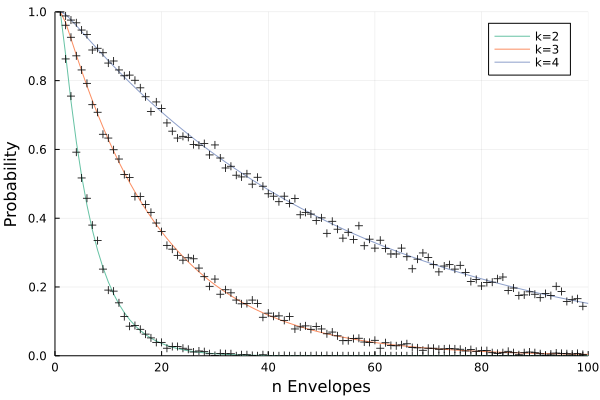

In [5]:
using Plots

occupancyAnalytic(n,r) = sum([(-1)^k*binomial(n,k)*(n-k)^r/(n^r) for k in 0:n])

function occupancyMC(n,r,N)
    fullCount = 0
    for _ in 1:N
        envelopes = zeros(Int, n)
        for k in 1:r
            target = rand(1:n)
            envelopes[target] += 1
        end
        numFilled = sum(envelopes .> 0)
        if numFilled == n
            fullCount += 1
        end
    end
    return fullCount/N
end

max_n, N, Kvals = 100, 10^3, [2,3,4]

analytic = [[occupancyAnalytic(big(n), big(k*n)) for n in 1:max_n] for k in Kvals]
monteCarlo = [[occupancyMC(big(n),big(k*n),N) for n in 1:max_n] for k in Kvals]

plot(1:max_n, analytic, palette=:Set2_3,
    label=["k=2" "k=3" "k=4"])
scatter!(1:max_n, monteCarlo, mc=:black, shape=:+,
    label="", xlims=(0,max_n), ylims=(0,1),
    xlabel="n Envelopes", ylabel="Probability", legend=:topright)